# Classification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
pd.set_option('display.max_columns',200)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
def algo_test(X,y): # train_test_split eklense iyi olur
    xgb=XGBClassifier()
    g=GaussianNB()
    b=BernoulliNB()
    k=KNeighborsClassifier()
    svc=SVC()
    d=DecisionTreeClassifier()
    log=LogisticRegression()
    gbc=GradientBoostingClassifier()
    mn=MultinomialNB()
    rf=RandomForestClassifier()
    ab=AdaBoostClassifier()
    
    algos=[xgb,g,b,k,svc,d,log,gbc,mn,rf,ab]
    algos_name=['XGBClassifier','Gaussian','Bernoulli','KNeighbors','SVC','DecisionTree','LogisticReg','GradientBoosting','MultinominalNB','RandomForest','AdaBoost']
    accuracy = []
    precision = []
    recall = []
    f1 = []
   
    result=pd.DataFrame(columns=['AccuracyScore','PrecisionScore','RecallScore','f1_Score'],index=algos_name)
    
    for i in algos:
        predict=i.fit(X,y).predict(X)
        accuracy.append(accuracy_score(y,predict))
        precision.append(precision_score(y,predict))
        recall.append(recall_score(y,predict))
        f1.append(f1_score(y,predict))
      
    result.AccuracyScore=accuracy
    result.PrecisionScore=precision
    result.RecallScore=recall
    result.f1_Score=f1
    
    return result.sort_values('f1_Score',ascending=False)

In [ ]:
df1 = pd.read_csv('/content/drive/Othercomputers/My Laptop/0 Yaz Kampı/Day 4/HW/diğer ödev/train.csv')
df2 = pd.read_csv('/content/drive/Othercomputers/My Laptop/0 Yaz Kampı/Day 4/HW/diğer ödev/test.csv')

In [ ]:
df1.shape, df2.shape

((891, 12), (418, 11))

In [ ]:
df = df1.append(df2) # Train ve Test datasi birlestirilir

## EDA

**Data Dictionary**

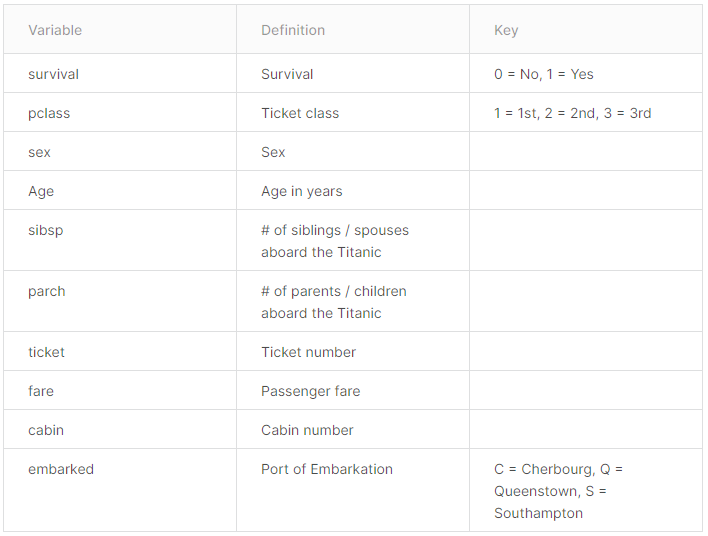

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [ ]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [ ]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


## Feature Engineering

In [ ]:
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.')
df.Title.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [ ]:
df.Title.replace(['Mlle', 'Ms'], 'Miss', inplace=True)
df.Title.replace(['Dona', 'Countess', 'Lady', 'Mme'], 'Mrs', inplace=True)
df.Title.replace(['Dr', 'Major', 'Col', 'Sir', 'Rev', 'Jonkheer', 'Capt', 'Don'], 'Mr', inplace=True)
df.Title.value_counts()

Mr        783
Miss      264
Mrs       201
Master     61
Name: Title, dtype: int64

In [ ]:
df['Family'] = df.SibSp + df.Parch + 1

In [ ]:
df['Senior'] = df.Age.map(lambda x: 1 if x>70 else 0) # Yasi 70 den buyuk olanlar Senior deriz

## Missing Values

In [ ]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Title             0
Family            0
Senior            0
dtype: int64

In [ ]:
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G']
df['Deck']=df['Cabin'].map(lambda x: x[0] if str(x)[0] in cabin_list else np.nan)
df.Deck.value_counts()
# Ardindan bos kalan kabinler su sekilde doldurulabilir
# Aile sayisi ayni olanlar ayni kabinde olacak sekilde
# veya bilet ucretine gore

C    94
B    65
D    46
E    41
A    22
F    21
G     5
T     1
Name: Deck, dtype: int64

In [ ]:
df.Age.fillna(df.groupby('Title')['Age'].transform('median'), inplace=True) # Yasdaki bosluklar ayni unvana sahip olanlarin yas medyanlari ile doldurulur
df.groupby('Title')['Age'].transform('median')

0      30.0
1      35.5
2      22.0
3      35.5
4      30.0
       ... 
413    30.0
414    35.5
415    30.0
416    30.0
417     4.0
Name: Age, Length: 1309, dtype: float64

In [ ]:
df.Fare.fillna(df.groupby('Pclass')['Fare'].transform('mean'), inplace=True) # Fare daki bosluk ayni Pclass sahip olanlarin Fare ortalamasi ile doldurulu
df.groupby('Pclass')['Fare'].transform('mean')

0      13.302889
1      87.508992
2      13.302889
3      87.508992
4      13.302889
         ...    
413    13.302889
414    87.508992
415    13.302889
416    13.302889
417    13.302889
Name: Fare, Length: 1309, dtype: float64

In [ ]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [ ]:
df.Embarked.fillna('S', inplace=True) # S en cok gectiginden

In [ ]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Title             0
Family            0
Senior            0
Deck           1014
dtype: int64

In [ ]:
df_for_deck = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
df.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [ ]:
df['Age*Class']=df['Age']*df['Pclass']

In [ ]:
df['Fare_Per_Person']=df['Fare']/(df['Family'])

## Prediction

In [ ]:
df_dummies = pd.get_dummies(df, drop_first=True)

In [ ]:
df_dummies

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Senior,Age*Class,Fare_Per_Person,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,0.0,3,22.0,1,0,7.2500,2,0,66.0,3.625000,1,0,1,0,1,0,0,0,0,0,0,0,0
1,1.0,1,38.0,1,0,71.2833,2,0,38.0,35.641650,0,0,0,0,0,1,0,1,0,0,0,0,0
2,1.0,3,26.0,0,0,7.9250,1,0,78.0,7.925000,0,0,1,1,0,0,0,0,0,0,0,0,0
3,1.0,1,35.0,1,0,53.1000,2,0,35.0,26.550000,0,0,1,0,0,1,0,1,0,0,0,0,0
4,0.0,3,35.0,0,0,8.0500,1,0,105.0,8.050000,1,0,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,30.0,0,0,8.0500,1,0,90.0,8.050000,1,0,1,0,1,0,0,0,0,0,0,0,0
414,NaN,1,39.0,0,0,108.9000,1,0,39.0,108.900000,0,0,0,0,0,1,0,1,0,0,0,0,0
415,NaN,3,38.5,0,0,7.2500,1,0,115.5,7.250000,1,0,1,0,1,0,0,0,0,0,0,0,0
416,NaN,3,30.0,0,0,8.0500,1,0,90.0,8.050000,1,0,1,0,1,0,0,0,0,0,0,0,0


In [ ]:
df_train = df_dummies[:891]
df_test = df_dummies[891:]

In [ ]:
df_train.shape, df_test.shape

((891, 23), (418, 23))

In [ ]:
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Senior,Age*Class,Fare_Per_Person,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,0.0,3,22.0,1,0,7.2500,2,0,66.0,3.62500,1,0,1,0,1,0,0,0,0,0,0,0,0
1,1.0,1,38.0,1,0,71.2833,2,0,38.0,35.64165,0,0,0,0,0,1,0,1,0,0,0,0,0
2,1.0,3,26.0,0,0,7.9250,1,0,78.0,7.92500,0,0,1,1,0,0,0,0,0,0,0,0,0
3,1.0,1,35.0,1,0,53.1000,2,0,35.0,26.55000,0,0,1,0,0,1,0,1,0,0,0,0,0
4,0.0,3,35.0,0,0,8.0500,1,0,105.0,8.05000,1,0,1,0,1,0,0,0,0,0,0,0,0


In [ ]:
algo_test(df_train.drop(columns='Survived'), df_train.Survived)

,AccuracyScore,PrecisionScore,RecallScore,f1_Score
DecisionTree,0.984287,0.993976,0.964912,0.979228
RandomForest,0.984287,0.993976,0.964912,0.979228
GradientBoosting,0.912458,0.917722,0.847953,0.881459
XGBClassifier,0.888889,0.895765,0.804094,0.847458
AdaBoost,0.846240,0.805970,0.789474,0.797637
LogisticReg,0.835017,0.803738,0.754386,0.778281
Gaussian,0.785634,0.691139,0.798246,0.740841
KNeighbors,0.804714,0.767516,0.704678,0.734756
Bernoulli,0.791246,0.739264,0.704678,0.721557
MultinominalNB,0.696970,0.621622,0.538012,0.576803


In [ ]:
rf=RandomForestClassifier()
predict=rf.fit(df_train.drop(columns='Survived'), df_train.Survived).predict(df_test.drop(columns='Survived'))

In [ ]:
submission = df2[['PassengerId']] # cift koseli parantez olmasi onemli
submission['Survived'] = predict

In [ ]:
submission

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,1.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [ ]:
submission.to_csv('titanic.csv', index=False) # Deck silinirse daha yuksek puan aliniyor

## Fill Cabin Column and Try Again
Basarisiz

In [ ]:
dolu = df_for_deck[df_for_deck['Deck'].notnull()]
bos = df_for_deck[df_for_deck['Deck'].isnull()]
len(bos), len(dolu)

(1014, 295)

In [ ]:
rf=RandomForestClassifier()
predict=rf.fit(pd.get_dummies(dolu.drop(columns=['Deck', 'Survived'])), dolu.Deck).predict(pd.get_dummies(bos.drop(columns=['Deck', 'Survived'])))

In [ ]:
bos.Deck = predict
bos.Deck.value_counts()

F    767
E     79
D     72
G     45
C     27
B     17
A      7
Name: Deck, dtype: int64

In [ ]:
df_final = dolu.append(bos)
df_final.sort_values(by='PassengerId', inplace=True)

In [ ]:
df_dummies = pd.get_dummies(df_final, drop_first=True)
df_train = df_dummies[:891]
df_test = df_dummies[891:]
df_train.shape, df_test.shape

((891, 22), (418, 22))

In [ ]:
df_dummies

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Senior,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,1,0.0,3,22.0,1,0,7.2500,2,0,1,0,1,0,1,0,0,0,0,0,1,0,0
1,2,1.0,1,38.0,1,0,71.2833,2,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,3,1.0,3,26.0,0,0,7.9250,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0
3,4,1.0,1,35.0,1,0,53.1000,2,0,0,0,1,0,0,1,0,1,0,0,0,0,0
4,5,0.0,3,35.0,0,0,8.0500,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,30.0,0,0,8.0500,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0
414,1306,NaN,1,39.0,0,0,108.9000,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
415,1307,NaN,3,38.5,0,0,7.2500,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0
416,1308,NaN,3,30.0,0,0,8.0500,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0


In [ ]:
algo_test(df_train.drop(columns=['Survived', 'PassengerId']), df_train.Survived)

,AccuracyScore,PrecisionScore,RecallScore,f1_Score
RandomForest,0.983165,0.990991,0.964912,0.977778
DecisionTree,0.983165,0.993958,0.961988,0.977712
GradientBoosting,0.900112,0.914754,0.815789,0.862442
XGBClassifier,0.882155,0.881029,0.801170,0.839204
AdaBoost,0.850730,0.825545,0.774854,0.799397
LogisticReg,0.832772,0.804416,0.745614,0.773900
KNeighbors,0.813692,0.787582,0.704678,0.743827
Gaussian,0.746352,0.626638,0.839181,0.717500
Bernoulli,0.789001,0.743671,0.687135,0.714286
MultinominalNB,0.690236,0.630952,0.464912,0.535354
